In [26]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
import glob
import intake

In [28]:
cat = intake.open_catalog("../catalog.yaml")

In [29]:
run = cat.FESOM['tco2559-ng5-cycle3_interpolated']

In [30]:
data = run['025_degree_monthly'].to_dask()

In [31]:
data

<xarray.Dataset>
Dimensions:  (time: 24, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2021-12-15
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables: (12/15)
    2t       (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    ci       (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    mld      (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    ocu      (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    ocv      (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    sav300   (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    ...       ...
    swvl1    (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    t20d     (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    tav300   (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    tsr      (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    ttr      (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
    zos      (time, lat, lon) float32 dask.array<chunksize=(24, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Fri May 05 16:58:50 2023: cdo --eccodes -f nc copy 2t.grb 2...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

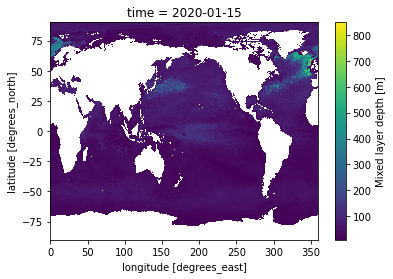

In [32]:
data['mld'][0,:].plot()

In [33]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [34]:
projection="PlateCarree"
working_projection = getattr(ccrs, projection)()
domain = None
if projection == "NorthPolarStereo":
    domain = domain or [-180, 180, 60, 90]
elif projection == "SouthPolarStereo":
    domain = domain or [-180, 180, -90, -60]
domain = domain or [-180, 180, -90, 90]

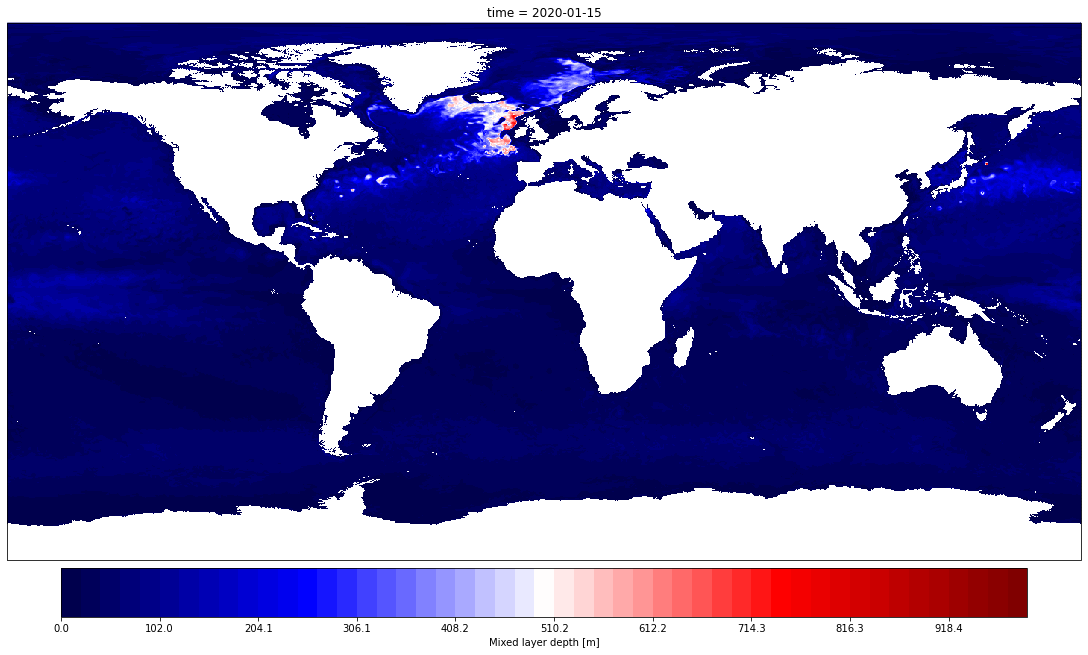

In [35]:
plt.subplots(
            1,
            1,
            subplot_kw=dict(projection=working_projection),
            constrained_layout=True,
            figsize=(15,10),
        )

data['mld'][0,:].plot( 
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={"shrink": 0.9, "pad": 0.01, "orientation": "horizontal"},
                      levels=np.linspace(0, 1000, 50),
                      cmap=cm.seismic
                     )